# ERA-5 on Google Cloud w/ xarray + zarr 

Original notebook: https://github.com/google-research/arco-era5/blob/main/docs/0-Surface-Reanalysis-Walkthrough.ipynb

Check [weatherbench2](https://github.com/google-research/weatherbench2) later

## Opening the Data

In [1]:
import fsspec

fs = fsspec.filesystem('gs')
fs.ls('gs://gcp-public-data-arco-era5/ar/')

['gcp-public-data-arco-era5/ar/1959-2022-1h-240x121_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-1h-360x181_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-128x64_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-128x64_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-1440x721.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-240x121_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-512x256_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-64x32_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-64x32_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-6h-0p25deg-chunk-1.zarr-v2',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-6h-0p25deg_der

In [2]:
import xarray as xr

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks=None,
    storage_options=dict(token='anon'),
)

c:\Users\ls2236\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
print(f'size: {reanalysis.nbytes / (1024 ** 4)} TiB')

size: 3344.695211229595 TiB


In [4]:
reanalysis

<xarray.Dataset>
Dimensions:                                                          (
                                                                      time: 1323648,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
  * time                                                             (time) datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 ...
    zero_degree_level                                                (time, latitude, longitude) float32 ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 07:32:47.309165
    valid_time_stop:   2024-05-31

In [183]:
#reanalysis.t2m.attrs #Don't run

# 'GRIB_name': '2 metre temperature'
# 'GRIB_cfVarName': 't2m'
#'GRIB_paramId': 167
# 'GRIB_shortName': '2t'

55151.958333333336

In [79]:


recent_an = reanalysis.sel(time='2020-01-01 12:00:00')

In [80]:
print(f'size: {recent_an.nbytes / (1024 ** 4)} TiB')

size: 0.0025268847712140996 TiB


In [128]:
#recent_an = recent_an.sel(level=1000)

721 1441


In [127]:
recent_an.get_index("level")

Index([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000],
      dtype='int64', name='level')

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [175]:
def lon_to_360(dlon: float) -> float:
  return ((360 + (dlon % 360)) % 360)

def roll_longitude(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')
#lonW = lon_to_360(-140)
#lonE = lon_to_360(-50)
lonW = -150
lonE = -40
latS = 18
latN = 90

#crs = ccrs.PlateCarree()


In [182]:
plt_data  = roll_longitude(recent_an)
plt_data = plt_data['2m_temperature']
plt_data=plt_data.sel(latitude = slice(90,20),longitude=slice(lonW,lonE))
print(f'size: {plt_data.nbytes / (1000000)} Mb')

size: 0.495684 Mb


In [184]:
plt_data

<xarray.DataArray '2m_temperature' (latitude: 281, longitude: 441)>
array([[245.96442, 245.96442, 245.96442, ..., 245.96442, 245.96442, 245.96442],
       [246.85847, 246.85693, 246.8554 , ..., 245.74435, 245.7459 , 245.74744],
       [247.2555 , 247.2555 , 247.25395, ..., 245.46275, 245.46584, 245.47198],
       ...,
       [295.14838, 295.18686, 295.25302, ..., 296.85648, 296.74414, 296.52255],
       [295.093  , 295.133  , 295.2684 , ..., 296.92572, 296.83493, 296.63797],
       [295.0822 , 295.18686, 295.3238 , ..., 297.01343, 296.89188, 296.68106]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float32 -150.0 -149.8 -149.5 ... -40.5 -40.25 -40.0
    time       datetime64[ns] 2020-01-01T12:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

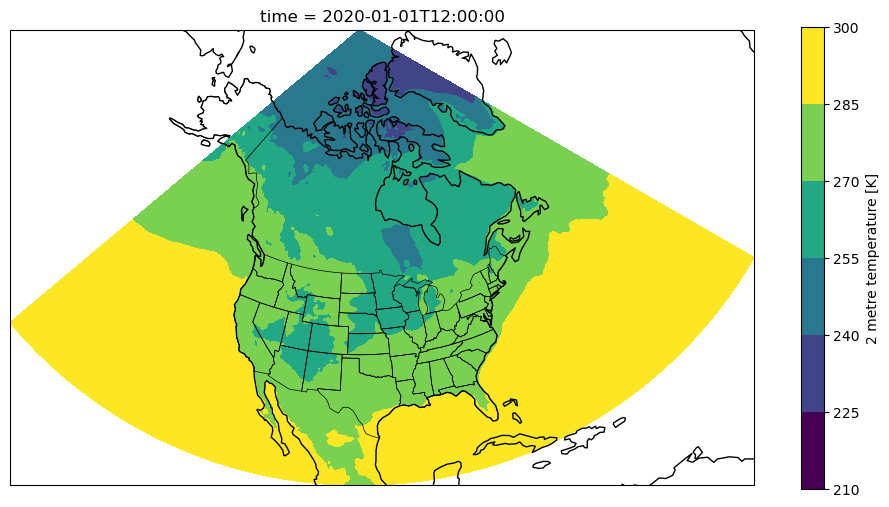

In [183]:

crs = ccrs.NorthPolarStereo(central_longitude=-100)
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=crs)
cplot = plt_data.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)
#ax.set_extent((lonW, lonE, latS, latN),ccrs.PlateCarree())
plt.show()
